In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 加载数据
file_path = r"C:\Users\Jiacheng Zheng\Downloads\1.xls"
data = pd.read_excel(file_path)

# 数据预处理
title_column = 'Article Title'
abstract_column = 'Abstract'
data['Combined_Text'] = data[title_column].fillna('') + " " + data[abstract_column].fillna('')

# 关键词列表
queries = ["Non-Pathogenic Alien Species", "Non-Pathogenic Invasive Species"]

# 自定义停用词
custom_stop_words = [
    'a', 'an', 'the', 'and', 'is', 'in', 'it', 'of', 'on', 
    'this', 'that', 'for', 'with', 'to', 'as', 'by', 'are'
]

# 初始化 TF-IDF
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = vectorizer.fit_transform(data['Combined_Text'])

# 计算相似度并取每个文档的最高相似度
relevance_scores = []
for query in queries:
    query_vector = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    relevance_scores.append(cosine_similarities)

# 获取每个文档的最高相似度作为最终相关性得分
data['Relevance_Score'] = pd.DataFrame(relevance_scores).max()

# 筛选结果
threshold = 0.1
filtered_data = data[data['Relevance_Score'] >= threshold].sort_values(by='Relevance_Score', ascending=False)

# 导出
output_path = r"C:\Users\Jiacheng Zheng\Downloads\1filtered_nlp_results.xlsx"
filtered_data.to_excel(output_path, index=False)
print(f"筛选完成！结果保存到 {output_path}")


筛选完成！结果保存到 C:\Users\Jiacheng Zheng\Downloads\1filtered_nlp_results.xlsx


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 加载数据
file_path = r"C:\Users\Jiacheng Zheng\Downloads\2.xls"
data = pd.read_excel(file_path)

# 数据预处理
title_column = 'Article Title'
abstract_column = 'Abstract'
data['Combined_Text'] = data[title_column].fillna('') + " " + data[abstract_column].fillna('')

# 关键词列表
queries = ["Non-Pathogenic Alien Species", "Non-Pathogenic Invasive Species"]

# 自定义停用词
custom_stop_words = [
    'a', 'an', 'the', 'and', 'is', 'in', 'it', 'of', 'on', 
    'this', 'that', 'for', 'with', 'to', 'as', 'by', 'are'
]

# 初始化 TF-IDF
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = vectorizer.fit_transform(data['Combined_Text'])

# 计算相似度并取每个文档的最高相似度
relevance_scores = []
for query in queries:
    query_vector = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    relevance_scores.append(cosine_similarities)

# 获取每个文档的最高相似度作为最终相关性得分
data['Relevance_Score'] = pd.DataFrame(relevance_scores).max()

# 筛选结果
threshold = 0.1
filtered_data = data[data['Relevance_Score'] >= threshold].sort_values(by='Relevance_Score', ascending=False)

# 导出
output_path = r"C:\Users\Jiacheng Zheng\Downloads\2filtered_nlp_results.xlsx"
filtered_data.to_excel(output_path, index=False)
print(f"筛选完成！结果保存到 {output_path}")


筛选完成！结果保存到 C:\Users\Jiacheng Zheng\Downloads\2filtered_nlp_results.xlsx


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 加载数据
file_path = r"C:\Users\Jiacheng Zheng\Downloads\3.xls"
data = pd.read_excel(file_path)

# 数据预处理
title_column = 'Article Title'
abstract_column = 'Abstract'
data['Combined_Text'] = data[title_column].fillna('') + " " + data[abstract_column].fillna('')

# 关键词列表
queries = ["Non-Pathogenic Alien Species", "Non-Pathogenic Invasive Species"]

# 自定义停用词
custom_stop_words = [
    'a', 'an', 'the', 'and', 'is', 'in', 'it', 'of', 'on', 
    'this', 'that', 'for', 'with', 'to', 'as', 'by', 'are'
]

# 初始化 TF-IDF
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = vectorizer.fit_transform(data['Combined_Text'])

# 计算相似度并取每个文档的最高相似度
relevance_scores = []
for query in queries:
    query_vector = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    relevance_scores.append(cosine_similarities)

# 获取每个文档的最高相似度作为最终相关性得分
data['Relevance_Score'] = pd.DataFrame(relevance_scores).max()

# 筛选结果
threshold = 0.1
filtered_data = data[data['Relevance_Score'] >= threshold].sort_values(by='Relevance_Score', ascending=False)

# 导出
output_path = r"C:\Users\Jiacheng Zheng\Downloads\3filtered_nlp_results.xlsx"
filtered_data.to_excel(output_path, index=False)
print(f"筛选完成！结果保存到 {output_path}")


筛选完成！结果保存到 C:\Users\Jiacheng Zheng\Downloads\3filtered_nlp_results.xlsx


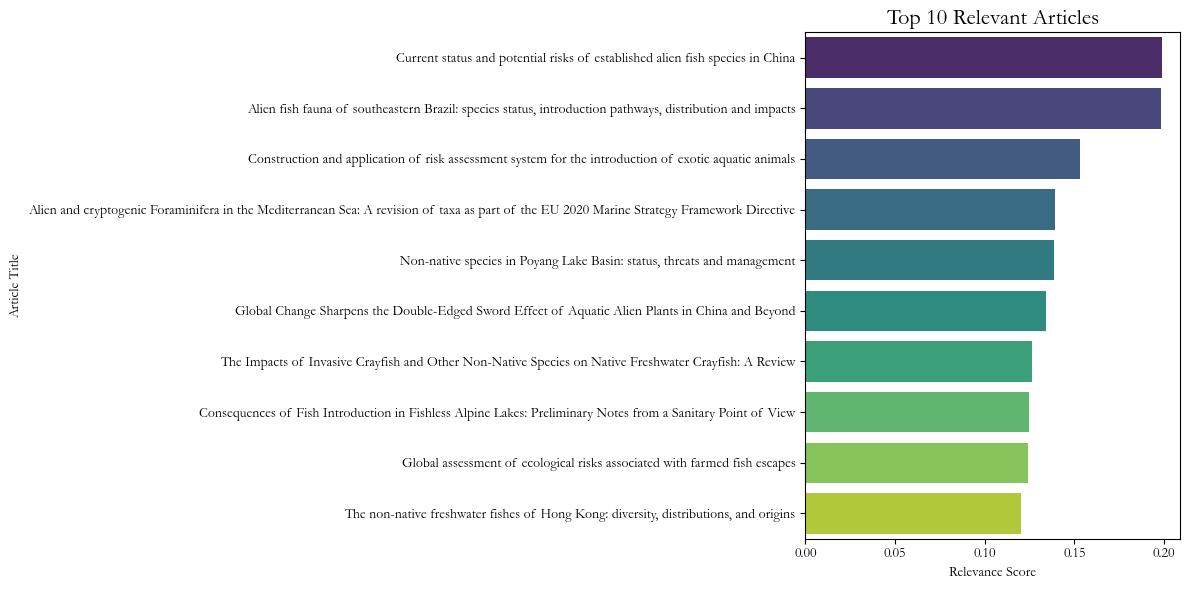

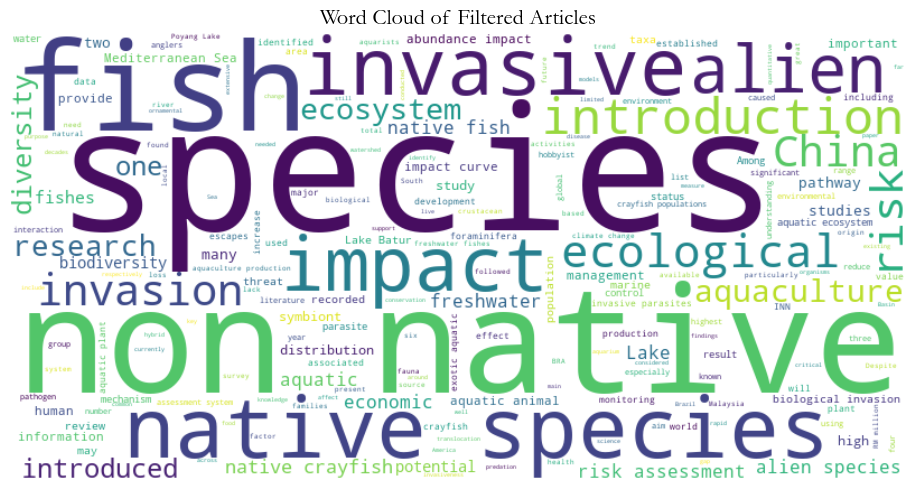

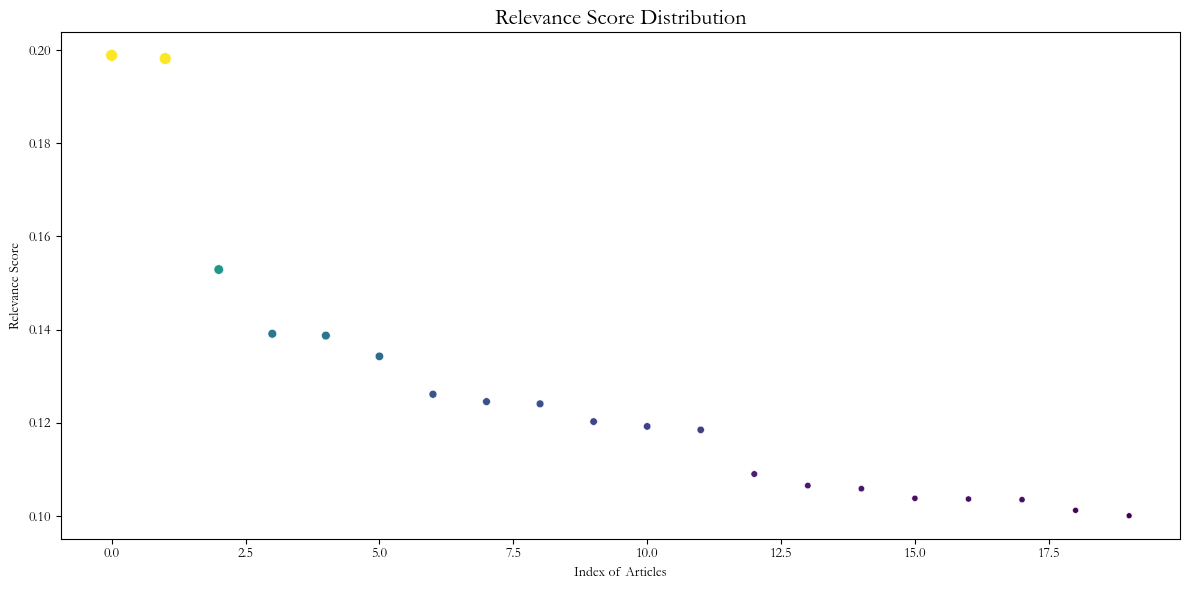

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# 加载筛选结果
file_path = r"C:\Users\Jiacheng Zheng\Downloads\3filtered_nlp_results.xlsx"
data = pd.read_excel(file_path)

# 确定使用前10个最相关的文章
top_n = 10
top_data = data.nlargest(top_n, 'Relevance_Score')

# 配置字体（可选，如果有中文标题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为支持中文的字体
plt.rcParams['axes.unicode_minus'] = False   # 防止负号显示异常

# ---- 图1: 条形图 - 前10文章相关性分数 ----
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Relevance_Score',
    y='Article Title',
    data=top_data,
    palette='viridis'
)
plt.title('Top 10 Relevant Articles', fontsize=16)
plt.xlabel('Relevance Score')
plt.ylabel('Article Title')
plt.tight_layout()
plt.savefig(r"C:\Users\Jiacheng Zheng\Downloads\3relevant_articles_barplot.svg")
plt.show()

# ---- 图2: 词云图 - 高频词 ----
text_for_wordcloud = " ".join(data['Combined_Text'].fillna('').tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Articles", fontsize=16)
plt.tight_layout()
plt.savefig(r"C:\Users\Jiacheng Zheng\Downloads\3filtered_articles_wordcloud.svg")
plt.show()

# ---- 图3: 散点图 - 相关性分数分布 ----
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=range(len(data)), 
    y='Relevance_Score', 
    data=data, 
    hue=data['Relevance_Score'], 
    palette='viridis', 
    size='Relevance_Score', 
    legend=False
)
plt.title('Relevance Score Distribution', fontsize=16)
plt.xlabel('Index of Articles')
plt.ylabel('Relevance Score')
plt.tight_layout()
plt.savefig(r"C:\Users\Jiacheng Zheng\Downloads\3relevance_score_scatterplot.svg")
plt.show()
